## Importing Libraries

In [1]:
from retinaface import RetinaFace
from deepface import DeepFace
from matplotlib import pyplot as plt
import cv2
import os 
import datetime as datetime
import pandas as pd
import numpy as np

## Steps 
first create a student database 
next is to detect faces from the image of a classroom and create a new image 
verify that image using deepface.find()
Print the output 

In [4]:
def matching(individual_image,key):
    DeepFace.find(img_path = individual_image, db_path = "students", model_name="ArcFace", distance_metric="cosine",detector_backend="retinaface",align = False) 

In [5]:
print("Detecting the faces in the classroom image")
student_directory = "students"
classroom_image_path = "test-image2.jpg"
classroom_img = cv2.imread(classroom_image_path)
#classroom_img = cv2.cvtColor(classroom_img, cv2.COLOR_BGR2RGB)
obj = RetinaFace.detect_faces(classroom_image_path)
students_in_classroom = [] 
for key in obj.keys():
    individual_data = obj[key]
    #print(individual_data)
    facial_area = individual_data["facial_area"]
    cv2.rectangle(classroom_img,(facial_area[0],facial_area[1]),
                    (facial_area[2],facial_area[3]),(255,0,0),2)
    individual_image = classroom_img[facial_area[1]:facial_area[3],facial_area[0]:facial_area[2]]
    individual_image_rgb = cv2.cvtColor(individual_image,cv2.COLOR_RGB2BGR)
    matching(individual_image,key)
    cv2.imshow("Individual Image",individual_image)
    cv2.waitKey(3000)


Detecting the faces in the classroom image
24-09-30 00:28:15 - Searching [[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255 255 255]
  ...
  [ 53  43  43]
  [ 67  56  59]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [ 20  14  19]
  ...
  [238 227 235]
  [245 232 240]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [ 33  23  29]
  ...
  [243 232 242]
  [241 224 237]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]] in 3 length datastore


ValueError: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

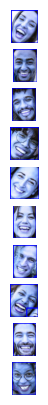

In [22]:
plt.figure(figsize=(5,5))
for i, img  in enumerate(students_in_classroom):
    plt.subplot(len(students_in_classroom),1,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()
